In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import zscore,pearsonr,ttest_1samp,ttest_ind,ttest_rel

pd.DataFrame.iteritems = pd.DataFrame.items
# Set the default plots style
sns.set_theme(style="white")

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True

# Set the default tick_params options for all axes
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = False
mpl.rcParams['ytick.direction'] = 'out'

# Set default text color
plt.rcParams['text.color'] = 'black'

# Set default axes label color
plt.rcParams['axes.labelcolor'] = 'black'

# Set default x and y tick colors
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


def p2sign(p):
    if  p<=0.001:
        sign='***'
    elif p<=0.01:
        sign='**'
    elif p<=0.05:
        sign='*'
    else:
        sign=''
    return sign

## Plot the correlation between the structural measures and the funcitonal measures

In [106]:
metrics = pd.read_csv(r'/mnt/workdir/DCM/Result/analysis/brain_metrics_game1_20231025.csv')

metrics['mPFC.thickness'] = (metrics['lh.mPFC.thickness'] + metrics['rh.mPFC.thickness'])/2
metrics['mPFC.volume'] = (metrics['lh.mPFC.volume'] + metrics['rh.mPFC.volume'])/2

metrics['EC.thickness'] = (metrics['lh.EC.thickness'] + metrics['rh.EC.thickness'])/2
metrics['EC.volume'] = (metrics['lh.EC.volume'] + metrics['rh.EC.volume'])/2

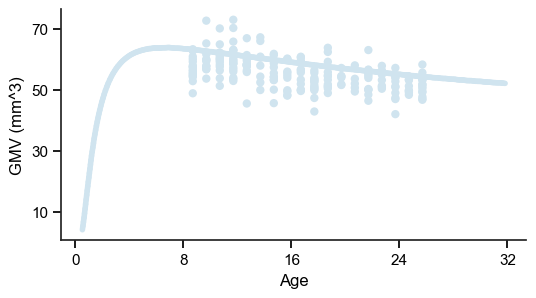

In [6]:
male_gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/data/male_GMV.csv',header=None, names=['Age', 'GMV'])
female_gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/data/female_GMV.csv',header=None, names=['Age', 'GMV'])

if len(male_gmv)<len(female_gmv):
    min_length = len(male_gmv)
else:
    min_length = len (female_gmv)
mean_gmv = (male_gmv['GMV'].to_numpy()[:min_length] + female_gmv['GMV'].to_numpy())/2
mean_age = (male_gmv['Age'].to_numpy()[:min_length] + female_gmv['Age'].to_numpy())/2

# calculate average GMV and generate new mean gmv
male_97gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/data/male_GMV_97.5percentage.csv',header=None, names=['Age', 'GMV'])
female_97gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/data/female_GMV_97.5percentage.csv',header=None, names=['Age', 'GMV'])

male_2gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/data/male_GMV_2.5percentage.csv',header=None, names=['Age', 'GMV'])
female_2gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/data/female_GMV_2.5percentage.csv',header=None, names=['Age', 'GMV'])

# calculate average GMV for 97th percentile and generate new mean 97gmv
if len(male_97gmv)<len(female_97gmv):
    min_length_97 = len(male_97gmv)
else:
    min_length_97 = len(female_97gmv)

mean_97gmv = (male_97gmv['GMV'].to_numpy()[:min_length_97] + female_97gmv['GMV'].to_numpy()[:min_length_97])/2
mean_age_97 = (male_97gmv['Age'].to_numpy()[:min_length_97] + female_97gmv['Age'].to_numpy()[:min_length_97])/2

# calculate average GMV for 2nd percentile and generate new mean 2gmv
if len(male_2gmv)<len(female_2gmv):
    min_length_2 = len(male_2gmv)
else:
    min_length_2 = len(female_2gmv)

mean_2gmv = (male_2gmv['GMV'].to_numpy()[:min_length_2] + female_2gmv['GMV'].to_numpy()[:min_length_2])/2
mean_age_2 = (male_2gmv['Age'].to_numpy()[:min_length_2] + female_2gmv['Age'].to_numpy()[:min_length_2])/2

# Assuming mean_age and mean_gmv are numpy arrays
mean_age = np.array(mean_age)
mean_gmv = np.array(mean_gmv)

fig,ax = plt.subplots(figsize=(6,3))

color = 'red'#F7CCC0
for i in range(len(mean_age)-1):
    if mean_gmv[i+1] < mean_gmv[i]: # if the value increases
        color = 'blue'
    if color =='red':
        plt.plot(mean_age[i:i+2], mean_gmv[i:i+2], color='#D0E4EF',linewidth=4)
    else:#c3d5f2
        plt.plot(mean_age[i:i+2], mean_gmv[i:i+2], color='#D0E4EF',linewidth=4)
sub_gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/DCM_qyk.csv')
sub_gmv['GMV (mm^3)'] = sub_gmv['GMV']/10000
sub_gmv['Age'] = sub_gmv['Age'] + 0.7
sns.scatterplot(data=sub_gmv,x='Age',y='GMV (mm^3)', edgecolor='none', color='#D0E4EF', alpha=1)
plt.xticks([0,8,16,24,32])
plt.yticks([10,30,50,70])
plt.savefig(r'/mnt/workdir/DCM/Result/paper/figure6/brainchart_GMV.pdf', bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

169
Correlation between EC.FA and Age
r 0.189 p 0.014
169
Correlation between mPFC.FA and Age
r 0.213 p 0.005
169
Correlation between EC.MD and Age
r -0.181 p 0.018
169
Correlation between mPFC.MD and Age
r 0.02 p 0.801
169
Correlation between EC.FA and game1_acc
r 0.162 p 0.035
169
Correlation between mPFC.FA and game1_acc
r 0.18 p 0.019
169
Correlation between EC.MD and game1_acc
r -0.168 p 0.029
169
Correlation between mPFC.MD and game1_acc
r -0.019 p 0.806


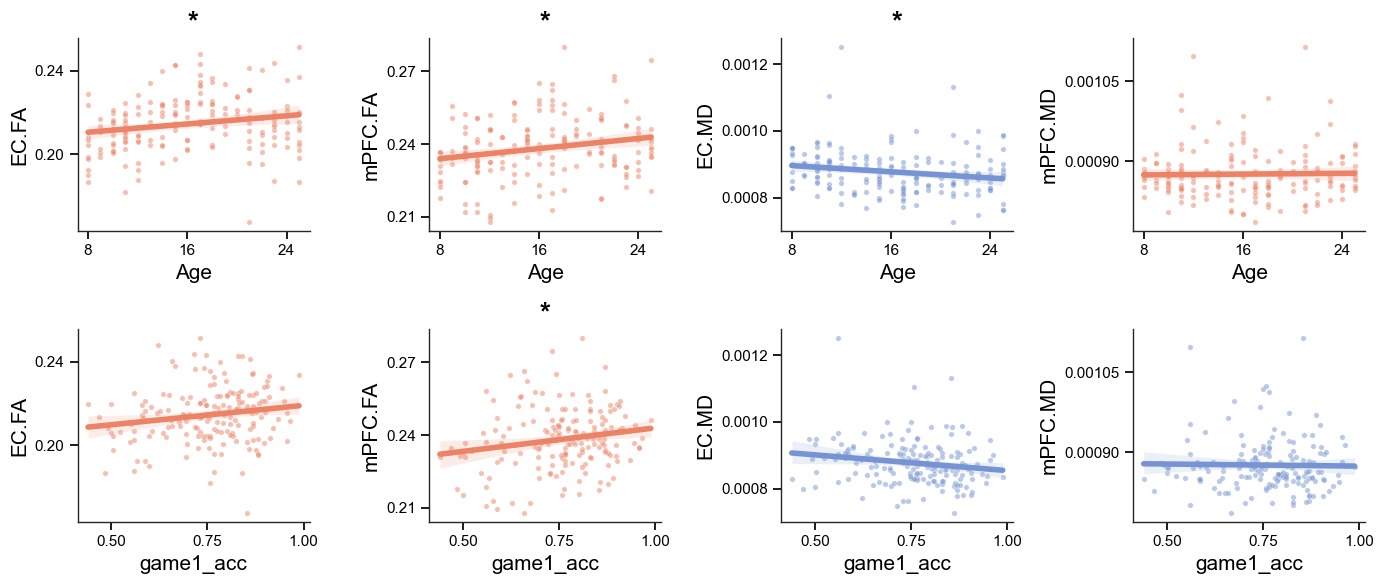

In [29]:
#brain_measures = ['EC.thickness','mPFC.thickness','EC.volume','mPFC.volume']
brain_measures = ['EC.FA','mPFC.FA','EC.MD','mPFC.MD']
beh_measures = ['Age','game1_acc']
# Initialize the plot
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(14,6),sharex='row')

from matplotlib.ticker import MaxNLocator
for i, beh_measure in enumerate(beh_measures):
    for j, brain_measure in enumerate(brain_measures):
        # Compute pearson correlation
        metrics = metrics.dropna(subset=[brain_measure])
        print(len(metrics))
        r, p = pearsonr(metrics[brain_measure], metrics[beh_measure])
        print("Correlation between %s and %s" % (brain_measure, beh_measure))
        print('r', round(r,3), 'p', round(p,3))
        
        if r >0:
            color = '#ec8266'
        else:
            color = '#7694d3'
        sns.scatterplot(data=metrics, x=beh_measure, y=brain_measure, color=color, s=15, alpha=.5, ax=axs[i][j])
        sns.regplot(data=metrics, x=beh_measure, y=brain_measure, color=color, order=1, scatter=False,line_kws={'linewidth': 4}, ax=axs[i][j])

        # Setup labels and despine
        axs[i,j].xaxis.set_major_locator(MaxNLocator(nbins=3))
        axs[i,j].yaxis.set_major_locator(MaxNLocator(nbins=3))

        axs[i][j].set_xlabel(beh_measure, fontsize=15)
            
        axs[i][j].set_ylabel(brain_measure, fontsize=15)
    
        axs[i][j].spines['left'].set_linewidth(1)
        axs[i][j].spines['bottom'].set_linewidth(1)            
        # Add title based on significance level
        axs[i][j].tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
        axs[i][j].tick_params(axis='y', which='both', left=True, right=False, direction='out')
        
        title = p2sign(p*2)
        axs[i][j].set_title(title, size=20, fontweight='bold')

# Uncomment the lines below if you want to save the figure
fig.tight_layout()
#savepath = '/mnt/workdir/DCM/Result/paper/figure6/corr_structural_behavior.pdf'
#plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

# Show the plot
plt.show()

Correlation between EC.volume_mean and Age
r 0.359 p 0.0
Correlation between mPFC.volume_mean and Age
r -0.682 p 0.0
Correlation between EC.volume_mean and game1_acc
r 0.193 p 0.006
Correlation between mPFC.volume_mean and game1_acc
r -0.399 p 0.0


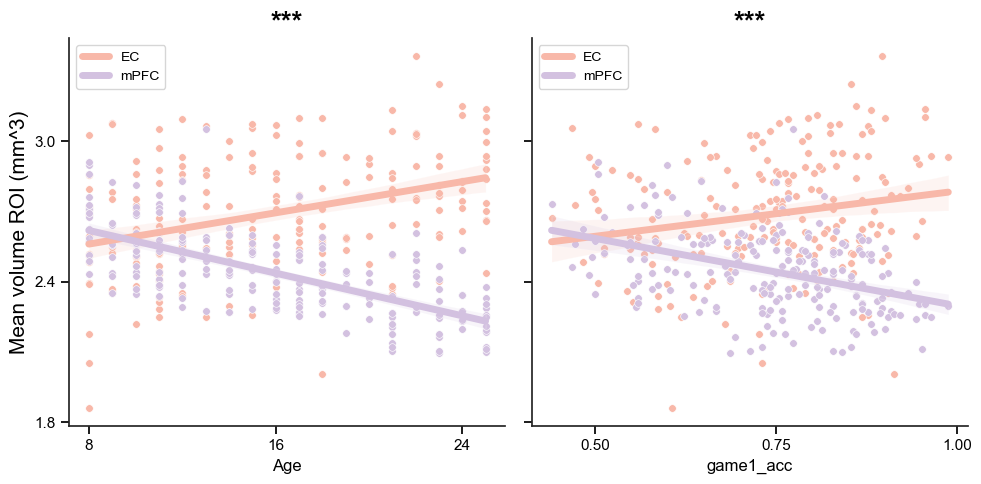

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler
scaler = MinMaxScaler()

brain_measures = ['EC.volume_mean','mPFC.volume_mean']
beh_measures = ['Age','game1_acc']

# divide NVoxels to get the mean volume 
metrics['EC.volume_mean'] = metrics['EC.volume']/2369
metrics['mPFC.volume_mean'] = metrics['mPFC.volume']/5367

# Initialize the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5),sharey='row')

from matplotlib.ticker import MaxNLocator

for i, beh_measure in enumerate(beh_measures):
    for j, brain_measure in enumerate(brain_measures):
        # Compute pearson correlation
        r, p = pearsonr(metrics[brain_measure], metrics[beh_measure])
        print("Correlation between %s and %s" % (brain_measure, beh_measure))
        print('r', round(r,3), 'p', round(p,3))
            
        if 'EC' in brain_measure:
            color = '#F8B8A9'
            label= 'EC'
        elif 'mPFC' in brain_measure:
            color = '#D3C1E0'
            label= 'mPFC'
        
        sns.scatterplot(data=metrics, x=beh_measure, y=brain_measure, color=color, s=30, ax=axs[i])
        sns.regplot(data=metrics, x=beh_measure, y=brain_measure, color=color, order=1, scatter=False,line_kws={'linewidth': 5}, ax=axs[i],label=label)

        # Setup labels and despine
        axs[i].xaxis.set_major_locator(MaxNLocator(nbins=3))
        axs[i].yaxis.set_major_locator(MaxNLocator(nbins=3))

        axs[i].set_ylabel('Mean volume ROI (mm^3)', fontsize=15)

        title = p2sign(p)
        axs[i].set_title(title, size=20, fontweight='bold')
        axs[i].legend(loc='upper left', fontsize=10)

# Uncomment the lines below if you want to save the figure
fig.tight_layout()
savepath = '/mnt/workdir/DCM/Result/paper/figure6/corr_structural-thickness_behavior.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

# show the plot
plt.show()

Correlation between EC.FA and Age
r 0.183 p 0.017
Correlation between mPFC.FA and Age
r 0.233 p 0.002
Correlation between EC.FA and game1_acc
r 0.144 p 0.062
Correlation between mPFC.FA and game1_acc
r 0.191 p 0.013


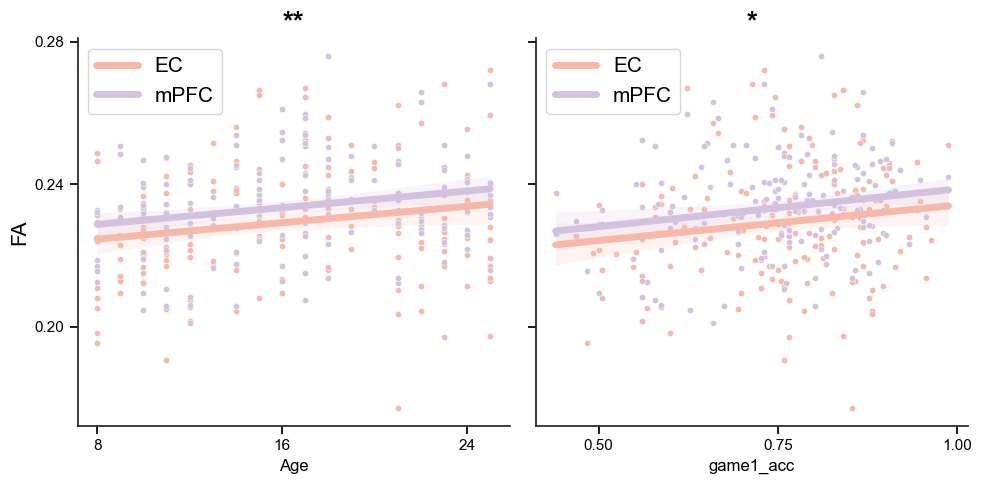

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler
scaler = MinMaxScaler()
brain_measures = ['EC.FA','mPFC.FA']
beh_measures = ['Age','game1_acc']

# Initialize the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5),sharey='row')
from matplotlib.ticker import MaxNLocator

for i, beh_measure in enumerate(beh_measures):
    for j, brain_measure in enumerate(brain_measures):
        # Extract the relevant columns
        x = metrics[beh_measure]
        y = metrics[brain_measure]

        # Compute correlation handling NaN
        if 'FA' in brain_measure:
            idx = np.isfinite(x) & np.isfinite(y)
            r, p = pearsonr(x[idx], y[idx])
        else:
            r, p = pearsonr(x, y)

        print("Correlation between %s and %s" % (brain_measure, beh_measure))
        print('r', round(r,3), 'p', round(p,3))
        if 'EC' in brain_measure:
            color = '#F8B8A9'
            label= 'EC'
        elif 'mPFC' in brain_measure:
            color = '#D3C1E0'
            label= 'mPFC'

        sns.scatterplot(data=metrics, x=beh_measure, y=brain_measure, color=color, s=20, ax=axs[i])
        sns.regplot(data=metrics, x=beh_measure, y=brain_measure, color=color, order=1, scatter=False,line_kws={'linewidth': 5}, ax=axs[i],label=label)

        # Setup labels and despine
        axs[i].xaxis.set_major_locator(MaxNLocator(nbins=3))
        axs[i].yaxis.set_major_locator(MaxNLocator(nbins=3))

        axs[i].set_ylabel('FA', fontsize=15)

        title = p2sign(p)
        axs[i].set_title(title, size=20, fontweight='bold')
        axs[i].legend(loc='upper left', fontsize=15)

# Uncomment the lines below if you want to save the figure
fig.tight_layout()
savepath = '/mnt/workdir/DCM/Result/paper/figure6/corr_dwi_behavior.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

# Show the plot
plt.show()

r 0.0553 p 0.4753


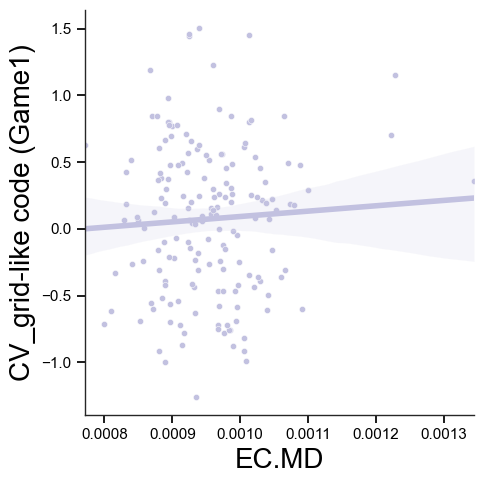

In [48]:
# Initialize the plot
x = 'EC.FA'
y = 'CV_grid-like code (Game1)'
metrics_dropna = metrics.dropna(subset=[x,y])

fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=metrics_dropna,x=x, y='CV_grid-like code (Game1)', color='#C2C1E0', s=20, alpha=1, ax=ax)
sns.regplot(data=metrics_dropna,x=x, y='CV_grid-like code (Game1)', color='#C2C1E0', order=1, scatter=False,line_kws={'linewidth': 4}, ax=ax)

# Setup labels and despine
ax.set_xlabel(x, fontsize=20)
ax.set_ylabel(y, fontsize=20)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
# ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
# ax.yaxis.set_major_locator(MaxNLocator(nbins=3))

# Compute pearson correlation
r, p = pearsonr(metrics_dropna[x], metrics_dropna[y])
print('r', round(r,4), 'p', round(p,4))

# Add title based on significance level
ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')

title = p2sign(p)
ax.set_title(title, size=20, fontweight='bold')

# Uncomment the lines below if you want to save the figure
fig.tight_layout()
# savepath = '/mnt/workdir/DCM/Result/paper/figure6/corr_structural_functional.pdf'
# plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

# Show the plot
plt.show()

In [98]:
import pingouin as pg

metrics = metrics.dropna(subset=['Distance code (Game2-mPFC)'])
#metrics_game2['mean distance code'] = (metrics_game2['Distance code (Game1-mPFC)'] + metrics_game2['Distance code (Game2-mPFC)'])/2
metrics['Grid-like code (mPFC)'] = (metrics['CV2_Grid-like code (Game1-mPFC)'] + metrics['Map-alignment2 (Game2-mPFC)'])

/tmp/ipykernel_570076/2905614222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['Grid-like code (mPFC)'] = (metrics['CV2_Grid-like code (Game1-mPFC)'] + metrics['Map-alignment2 (Game2-mPFC)'])


In [102]:
iv = 'mPFC.volume'
m = ['Age']
dv = 'Grid-like code (mPFC)'

from sklearn.preprocessing import StandardScaler
# Instantiate the StandardScaler
scaler = StandardScaler()
# fit the scaler to the columns and transform
var = [iv] + m + [dv]
metrics[var] = scaler.fit_transform(metrics[var])

# Mediation analysis
mediation_results,indirect_beta_sample = pg.mediation_analysis(data=metrics, x=iv, m=m, y=dv,seed=42,n_boot=10000,return_dist=True)
print(mediation_results.round(3))
#mediation_results.to_csv(r'/mnt/workdir/DCM/Result/paper/figure6/mediation_results_age.csv')

/tmp/ipykernel_570076/188995978.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics[var] = scaler.fit_transform(metrics[var])


       path   coef     se   pval  CI[2.5%]  CI[97.5%]  sig
0   Age ~ X -0.687  0.053  0.000    -0.791     -0.584  Yes
1   Y ~ Age  0.210  0.071  0.003     0.070      0.349  Yes
2     Total -0.197  0.071  0.006    -0.337     -0.057  Yes
3    Direct -0.100  0.097  0.308    -0.292      0.093   No
4  Indirect -0.097  0.070  0.144    -0.239      0.035   No


/tmp/ipykernel_570076/2453907045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['EC.volume_mean'] = metrics['EC.volume']/2369
/tmp/ipykernel_570076/2453907045.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['mPFC.volume_mean'] = metrics['mPFC.volume']/5367


Correlation between mPFC.thickness and Grid-like code (mPFC)
r -0.202 p 0.005


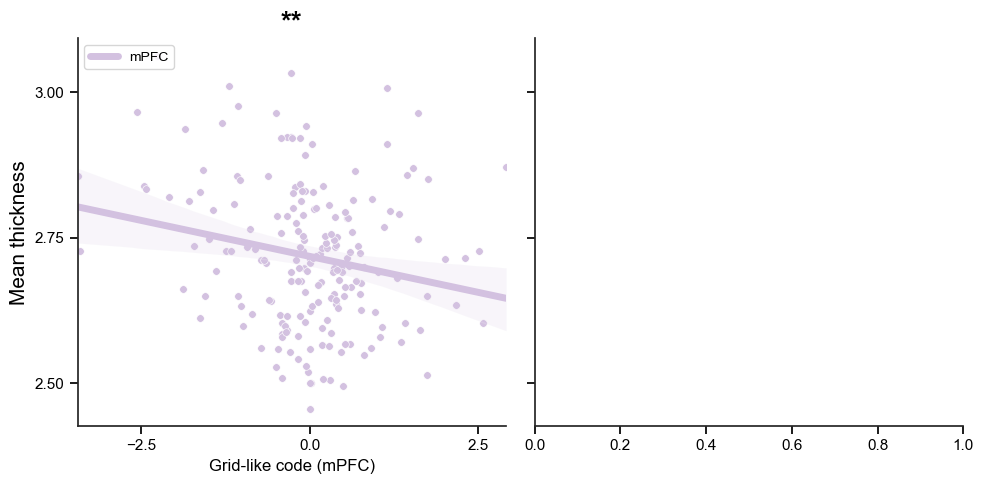

In [104]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler
scaler = MinMaxScaler()

brain_measures = ['mPFC.thickness']
beh_measures = ['Grid-like code (mPFC)']

# divide NVoxels to get the mean volume 
metrics['EC.volume_mean'] = metrics['EC.volume']/2369
metrics['mPFC.volume_mean'] = metrics['mPFC.volume']/5367

# Initialize the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5),sharey='row')

from matplotlib.ticker import MaxNLocator

for i, beh_measure in enumerate(beh_measures):
    for j, brain_measure in enumerate(brain_measures):
        # Extract the relevant columns
        x = metrics[beh_measure]
        y = metrics[brain_measure]
        
        # Compute correlation handling NaN
        if 'FA' in brain_measure:
            idx = np.isfinite(x) & np.isfinite(y)
            r, p = pearsonr(x[idx], y[idx])
        else:
            r, p = pearsonr(x, y)
        print("Correlation between %s and %s" % (brain_measure, beh_measure))
        print('r', round(r,3), 'p', round(p,3))

        if 'EC' in brain_measure:
            color = '#F8B8A9'
            label= 'EC'
        elif 'mPFC' in brain_measure:
            color = '#D3C1E0'
            label= 'mPFC'

        sns.scatterplot(data=metrics, x=beh_measure, y=brain_measure, color=color, s=30, ax=axs[i])
        sns.regplot(data=metrics, x=beh_measure, y=brain_measure, color=color, order=1, scatter=False,line_kws={'linewidth': 5}, ax=axs[i],label=label)

        # Setup labels and despine
        axs[i].xaxis.set_major_locator(MaxNLocator(nbins=3))
        axs[i].yaxis.set_major_locator(MaxNLocator(nbins=3))

        axs[i].set_ylabel('Mean thickness', fontsize=15)

        title = p2sign(p)
        axs[i].set_title(title, size=20, fontweight='bold')
        axs[i].legend(loc='upper left', fontsize=10)

# Uncomment the lines below if you want to save the figure
fig.tight_layout()

# show the plot
plt.show()

In [93]:
import pingouin as pg
iv = 'mPFC.FA'
m = ['Age']
dv = 'Grid-like code (mPFC)'

from sklearn.preprocessing import StandardScaler
# Instantiate the StandardScaler
scaler = StandardScaler()
# fit the scaler to the columns and transform
var = [iv] + m + [dv]
metrics[var] = scaler.fit_transform(metrics[var])
# metrics[var] = scaler.fit_transform(metrics[var])

# Mediation analysis
mediation_results,indirect_beta_sample = pg.mediation_analysis(data=metrics, x=iv, m=m, y=dv,seed=42,n_boot=10000,return_dist=True)
print(mediation_results.round(3))

/tmp/ipykernel_570076/970319571.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics[var] = scaler.fit_transform(metrics[var])


       path   coef     se   pval  CI[2.5%]  CI[97.5%]  sig
0   Age ~ X  0.226  0.075  0.003     0.079      0.373  Yes
1   Y ~ Age  0.182  0.074  0.015     0.036      0.329  Yes
2     Total  0.134  0.073  0.069    -0.010      0.279   No
3    Direct  0.098  0.074  0.190    -0.049      0.245   No
4  Indirect  0.036  0.021  0.043     0.004      0.090  Yes


In [151]:
mediaiton_results = pd.DataFrame(mediation_results)
coef = mediation_results['coef'].to_numpy()
start = ['mPFC.volume','Age','mPFC.volume']
end = ['Age','Distance code (Game2)','Distance code (Game2)']
value = [0.687, 0.402, 0.156]

mediaiton_results_plot = {}
mediaiton_results_plot['source'] = start
mediaiton_results_plot['target'] = end
mediaiton_results_plot['value'] = value
mediaiton_results_plot = pd.DataFrame(mediaiton_results_plot)
mediaiton_results_plot.to_csv(r'/mnt/workdir/DCM/Result/paper/figure6/mediation_results_plot.csv')

In [134]:
metrics = metrics.dropna()
pearsonr(metrics['EC.thickness'],metrics['Map-alignment (Game2-EC)']) 

PearsonRResult(statistic=0.02402565158823956, pvalue=0.7593662475837718)